## Integrantes:
* Igor Gabriel - RM553544
* Maria Beatriz - RM552669
* Nicholas Lima - RM552744










# Idéia do projeto

## Iremos obter dados através de um mockup de um protótipo de uma tomada inteligente, esse dispositivo é capaz de medir a energia sendo utilizada pela tomada, possibilitando calcular o preço gerado na sua conta de luz com aquela tomada, com o uso de Inteligencia artificial podemos descobrir se o uso esta aumentando ou diminuindo com o tempo entre outros dados.


O dataset contém:
* 10 colunas
* 500 linhas

As colunas são:
* User: e-mails dos donos do produto.
* ID: identificador único da tomada.
* Modelo: tipo do dispositivo (1 ou 2).
* Local: cômodo onde a tomada está instalada.
* Watt-Mes: consumo em watts no mês.
* Watt-Dia: consumo em watts no dia.
* Watt-Atual: consumo em watts no momento.
* Voltagem-Atual: voltagem no momento.
* Corrente-Atual: corrente em uso no momento.
* Valor-Conta: custo estimado em reais baseado no consumo mensal.

## Importação de bibliotecas

In [16]:
# Opera dataframes e tabelas
import pandas as pd

# Separa os dados em dados de treinamento e teste
from sklearn.model_selection import train_test_split

# Normaliza os dados
from sklearn.preprocessing import MinMaxScaler

# Classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Visualizador do Random Forest
from sklearn.tree import plot_tree

# Pacote para cálculo da acurácia do modelo de classificação:
from sklearn.metrics import accuracy_score

# Pacote para geração de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Validador de acuracia
from sklearn.model_selection import cross_val_score

# Pacotes para criação de Rede Neural Keras
from tensorflow import keras
from tensorflow.keras import layers

# Scaler para ajustar os dados
from sklearn.preprocessing import StandardScaler

## Importação dos dados


In [17]:
# Pegando o dataset

dados_consumo_raw = pd.read_csv('/content/Dados-Tomada-BIN.csv')

## Visualizando os dados

In [18]:
dados_consumo_raw

,User,ID,Modelo,Local,Watt-dia,Watt-Mes,Watt-Atual,Voltagem-Atual,Corrente-Atual,Valor-Conta,...,Watt-Ago-2024,Watt-Set-2024,Watt-Out-2024,Watt-Nov-2024,Valor-Conta-Jun-2024,Valor-Conta-Jul-2024,Valor-Conta-Ago-2024,Valor-Conta-Set-2024,Valor-Conta-Out-2024,Valor-Conta-Nov-2024
0,user001@example.com,0,2,Banheiro,1.22,58.77,0.17,222.968559,0.0,43.83,...,49.12,43.43,31.86,29.96,19.81,23.33,36.63,32.39,23.76,22.34
1,user001@example.com,1,2,Garagem,1.02,42.78,0.06,220.255963,0.0,31.90,...,44.36,30.80,40.15,34.48,26.66,37.69,33.08,22.97,29.94,25.71
2,user001@example.com,2,1,Garagem,4.97,40.47,0.11,222.758329,0.0,30.18,...,39.48,42.71,34.75,33.43,30.57,21.08,29.44,31.85,25.91,24.93
3,user001@example.com,3,1,Escritorio,2.23,30.65,0.14,230.189336,0.0,22.86,...,27.83,30.93,32.42,41.04,24.82,32.83,20.75,23.06,24.18,30.60
4,user002@example.com,4,1,Quarto,4.28,56.17,0.06,224.577673,0.0,41.89,...,27.76,50.51,42.01,35.00,28.23,26.94,20.70,37.67,31.33,26.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,user166@example.com,738,2,Escritorio,3.31,67.96,0.16,233.183129,0.0,50.68,...,40.65,42.45,33.18,32.95,26.18,28.49,30.31,31.66,24.74,24.57
739,user166@example.com,739,1,Banheiro,2.15,34.44,0.08,223.886401,0.0,25.68,...,29.68,33.72,44.97,39.47,22.68,36.61,22.13,25.15,33.53,29.43
740,user166@example.com,740,2,Cozinha,3.75,51.06,0.18,232.261195,0.0,38.08,...,37.56,48.89,37.02,45.66,34.26,19.04,28.01,36.46,27.61,34.05
741,user166@example.com,741,2,Banheiro,2.66,31.99,0.09,235.887500,0.0,23.86,...,27.21,36.42,50.19,32.40,30.75,34.29,20.29,27.16,37.43,24.16


### Escolhendo um usuário para fazer a analise

In [19]:
# Procurando o Usuário com mais produtos para usar como exemplo
most_frequent_email = dados_consumo_raw['User'].mode()[0]

# Mostra o User com mais produtos
most_frequent_email

'user002@example.com'

In [20]:
# Filtra o DataFrame para incluir apenas as informações do usuário 'user039@email.com'
dados_consumo_exemplo = dados_consumo_raw[dados_consumo_raw.User == 'user002@example.com']

In [21]:
# Tratando o dataset para que siga as regras de negócio
dados_consumo_exemplo = dados_consumo_exemplo.drop_duplicates(subset=['Local'])

### Gerando Gráficos

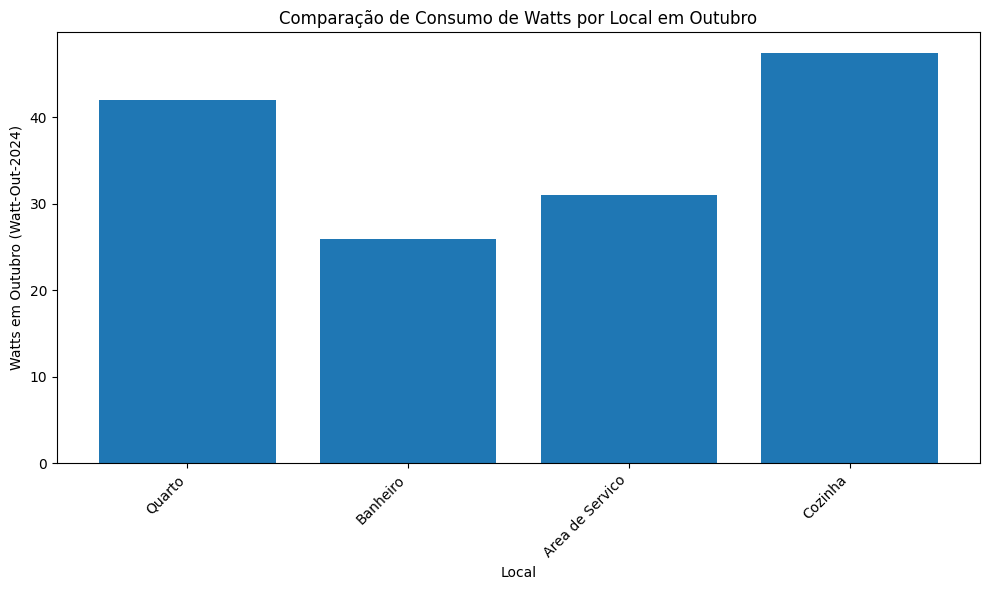

In [22]:
# @title Consumo por local
# Com base no usuário2 vamos identificar qual comodo mais consumiu energia em Outubro
plt.figure(figsize=(10, 6))
plt.bar(dados_consumo_exemplo['Local'], dados_consumo_exemplo['Watt-Out-2024'])
plt.xlabel('Local')
plt.ylabel('Watts em Outubro (Watt-Out-2024)')
plt.title('Comparação de Consumo de Watts por Local em Outubro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

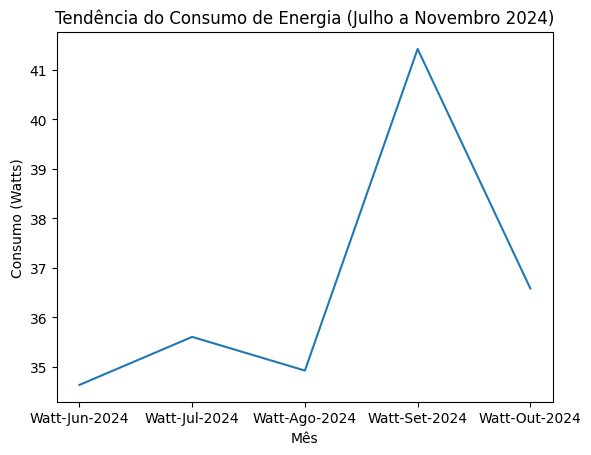

In [23]:
# @title Tendencia de Consumo
# Vamos observar a tendencia do consumo do usuário2
# Selecionar as colunas de consumo de Watt de Junho a Outubro de 2024
consumo_watts = dados_consumo_exemplo[['Watt-Jun-2024','Watt-Jul-2024', 'Watt-Ago-2024', 'Watt-Set-2024', 'Watt-Out-2024']]

# Criar um gráfico de linha para visualizar a tendência do consumo
plt.plot(consumo_watts.columns, consumo_watts.mean())
plt.xlabel('Mês')
plt.ylabel('Consumo (Watts)')
plt.title('Tendência do Consumo de Energia (Julho a Novembro 2024)')
plt.show()

## Tratando os dados para criar um modelo Keras

In [24]:
# Pegando o consumo total por usuário e não por tomada
consumption_by_user = dados_consumo_raw.groupby('User').sum()

In [25]:
# Removendo as colunas irrelevantes para este use case
consumption_by_user = consumption_by_user.drop(['ID', 'Modelo', 'Local', 'Watt-Atual', 'Voltagem-Atual', 'Corrente-Atual', 'Valor-Conta', 'Watt-Mes'], axis=1)

In [26]:
#Gerando um csv com esses dados
consumption_by_user.to_csv("Dados-Usuarios-BIN.csv", index=True)

## Usando os datasets para treinar os modelos

In [27]:
# Pegando o dataset tratado
dados_consumo_keras = pd.read_csv('/content/Dados-Usuarios-BIN.csv')

### Modelo de detecção de consumo diário

In [28]:
# @title Treinando o primeiro modelo Keras

# Separando entre dados de treino e dados de teste
X = dados_consumo_keras[['Watt-dia']]  # Consumo do dia
y = (dados_consumo_keras['Watt-Jun-2024'] > 152.2).astype(int) # Consumo médio Mês

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usando o Scaler para deixar os dados dentro do mesmo padrão
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Criando o modelo
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),  # Input layer with 1 feature
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo nos dados
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Verificando o Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6077 - loss: 0.6553 - val_accuracy: 0.8519 - val_loss: 0.6371
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7981 - loss: 0.6394 - val_accuracy: 0.8519 - val_loss: 0.6187
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8162 - loss: 0.6211 - val_accuracy: 0.8519 - val_loss: 0.6022
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7995 - loss: 0.6095 - val_accuracy: 0.8519 - val_loss: 0.5877
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8065 - loss: 0.6028 - val_accuracy: 0.8519 - val_loss: 0.5736
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7992 - loss: 0.5885 - val_accuracy: 0.8519 - val_loss: 0.5597
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7922 - loss: 0.5800 - val_accuracy: 0.8889 - val_loss: 0.5462
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.5557 - val_accuracy: 0.8889 - val_loss: 0.5324
Epoch 9/50


In [29]:
# @title Testando o primeiro modelo com inputs
def predict_consumption(watt_dia):
  """Predicts if consumption will be high based on daily consumption using the trained model."""
  input_data = pd.DataFrame({'Watt-dia': [watt_dia]})
  scaled_input = scaler.transform(input_data)
  prediction = model.predict(scaled_input)[0][0]

  if prediction > 0.5:
    return "Consumo previsto acima de 152.2 Watts"
  else:
    return "Consumo previsto abaixo de 152.2 Watts"

watt_dia_input = float(input("Digite o consumo do dia em Watts: "))

prediction_result = predict_consumption(watt_dia_input)

prediction_result

Digite o consumo do dia em Watts: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


'Consumo previsto abaixo de 152.2 Watts'

### Modelo de detecção de aumento de consumo

In [30]:
# @title Treinando o segundo modelo Keras

# Calculando a mudança entre o consumo dos meses no dataset
dados_consumo_keras['Consumo_Change_Jul'] = dados_consumo_keras['Watt-Jul-2024'] - dados_consumo_keras['Watt-Jun-2024']
dados_consumo_keras['Consumo_Change_Ago'] = dados_consumo_keras['Watt-Ago-2024'] - dados_consumo_keras['Watt-Jul-2024']
dados_consumo_keras['Consumo_Change_Set'] = dados_consumo_keras['Watt-Set-2024'] - dados_consumo_keras['Watt-Ago-2024']
dados_consumo_keras['Consumo_Change_Out'] = dados_consumo_keras['Watt-Out-2024'] - dados_consumo_keras['Watt-Set-2024']
dados_consumo_keras['Consumo_Change_Nov'] = dados_consumo_keras['Watt-Nov-2024'] - dados_consumo_keras['Watt-Out-2024']

# Gerando variáveis comparativas
dados_consumo_keras['Consumo_Increased_Jul'] = (dados_consumo_keras['Consumo_Change_Jul'] > 0).astype(int)
dados_consumo_keras['Consumo_Increased_Ago'] = (dados_consumo_keras['Consumo_Change_Ago'] > 0).astype(int)
dados_consumo_keras['Consumo_Increased_Set'] = (dados_consumo_keras['Consumo_Change_Set'] > 0).astype(int)
dados_consumo_keras['Consumo_Increased_Out'] = (dados_consumo_keras['Consumo_Change_Out'] > 0).astype(int)
dados_consumo_keras['Consumo_Increased_Nov'] = (dados_consumo_keras['Consumo_Change_Nov'] > 0).astype(int)

# Selecionando as features
features = ['Watt-dia', 'Watt-Jun-2024', 'Watt-Jul-2024', 'Watt-Ago-2024', 'Watt-Set-2024', 'Watt-Out-2024']
target = 'Consumo_Increased_Nov'  # Predict if consumption increases in November

# Separando entre treino e teste
X = dados_consumo_keras[features]
y = dados_consumo_keras[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usando o Scaler para deixar os dados dentro do mesmo padrão
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando o modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo nos dados
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Verificando o Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5279 - loss: 0.6964 - val_accuracy: 0.4074 - val_loss: 0.7230
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5397 - loss: 0.6866 - val_accuracy: 0.3704 - val_loss: 0.7123
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5546 - loss: 0.6827 - val_accuracy: 0.3704 - val_loss: 0.6981
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6247 - loss: 0.6743 - val_accuracy: 0.3704 - val_loss: 0.6922
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5987 - loss: 0.6737 - val_accuracy: 0.4074 - val_loss: 0.6863
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6573 - loss: 0.6639 - val_accuracy: 0.3704 - val_loss: 0.6894
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6723 - loss: 0.6535 - val_accuracy: 0.3704 - val_loss: 0.6905
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6216 - loss: 0.6631 - val_accuracy: 0.4444 - val_loss: 0.6845
Epoch 9/50


In [32]:
# @title Testando o segundo modelo com inputs

def predict_consumption_annual(watt_dia, watt_jun, watt_jul, watt_ago, watt_set, watt_out):
  """Predicts if consumption will increase in November based on previous months' consumption using the trained model."""
  input_data = pd.DataFrame({'Watt-dia': [watt_dia], 'Watt-Jun-2024': [watt_jun], 'Watt-Jul-2024': [watt_jul],
                             'Watt-Ago-2024': [watt_ago], 'Watt-Set-2024': [watt_set], 'Watt-Out-2024': [watt_out]})
  scaled_input = scaler.transform(input_data)
  prediction = model.predict(scaled_input)[0][0]

  if prediction > 0.5:
    return "Consumo previsto para aumentar em Novembro."
  else:
    return "Consumo previsto para diminuir ou se manter estável em Novembro."

# Get input from the user
watt_dia_input = float(input("Digite o consumo do dia em Watts: "))
watt_jun_input = float(input("Digite o consumo de Junho em Watts: "))
watt_jul_input = float(input("Digite o consumo de Julho em Watts: "))
watt_ago_input = float(input("Digite o consumo de Agosto em Watts: "))
watt_set_input = float(input("Digite o consumo de Setembro em Watts: "))
watt_out_input = float(input("Digite o consumo de Outubro em Watts: "))


prediction_result_annual = predict_consumption_annual(watt_dia_input, watt_jun_input, watt_jul_input, watt_ago_input, watt_set_input, watt_out_input)

prediction_result_annual

Digite o consumo do dia em Watts: 11
Digite o consumo de Junho em Watts: 120
Digite o consumo de Julho em Watts: 120
Digite o consumo de Agosto em Watts: 200
Digite o consumo de Setembro em Watts: 200
Digite o consumo de Outubro em Watts: 165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


'Consumo previsto para diminuir ou se manter estável em Novembro.'